In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('user_ratings.csv')

In [4]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
df['title'].value_counts()

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Hellsinki (Rööperi) (2009)            1
Our Lips Are Sealed (2000)            1
Edge of Love, The (2008)              1
Taking Care of Business (1990)        1
My Flesh and Blood (2003)             1
Name: title, Length: 9719, dtype: int64

In [6]:
print(df.value_counts().index)

MultiIndex([(610, 170875, 3.0, 1493846415, ...),
            (227,  54259, 2.5, 1447210634, ...),
            (227,  55721, 5.0, 1447210041, ...),
            (227,  55820, 4.0, 1447209881, ...),
            (227,  56367, 4.5, 1447210824, ...),
            (227,  56782, 4.5, 1447210013, ...),
            (227,  58303, 4.0, 1447210409, ...),
            (227,  58559, 4.5, 1447189506, ...),
            (227,  59315, 4.5, 1447210146, ...),
            (227,  59369, 4.5, 1447210745, ...),
            ...
            (434,   4034, 4.5, 1270604860, ...),
            (434,   4223, 1.5, 1270602479, ...),
            (434,   4226, 5.0, 1270603948, ...),
            (434,   4262, 4.0, 1270603516, ...),
            (434,   4306, 3.0, 1270604393, ...),
            (434,   4873, 4.5, 1270605083, ...),
            (434,   4878, 5.0, 1270606749, ...),
            (434,   4886, 4.5, 1270604658, ...),
            (434,   4896, 2.5, 1270604915, ...),
            (  1,      1, 4.0,  964982703, ...)],
   

In [7]:
avg_rating_df=df[['title','rating']].groupby('title').mean()

In [8]:
avg_rating_df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [10]:
sorted_avg_rating_df= avg_rating_df.sort_values(by='rating', ascending=False)
sorted_avg_rating_df.head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [11]:
# Gena is not familiar movie so we can test it that how many times the movie reviewed

(df['title']=='Gena the Crocodile (1969)').sum()

1

In [14]:
(df['title']=='Love and Pigeons (1985)').sum()

1

In [16]:
#movie frequency
movie_frequency=df['title'].value_counts()
print(movie_frequency)

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Hellsinki (Rööperi) (2009)            1
Our Lips Are Sealed (2000)            1
Edge of Love, The (2008)              1
Taking Care of Business (1990)        1
My Flesh and Blood (2003)             1
Name: title, Length: 9719, dtype: int64


In [17]:
frequently_reviewed_movies= movie_frequency[movie_frequency>150].index
print(frequently_reviewed_movies)
#index value is here, we want the names of movie instead of count of occurances.

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       'Fight Club (1999)', 'Toy Story (1995)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'American Beauty (1999)', 'Usual Suspects, The (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Independence Day (a.k.a. ID4) (1996)',
       'Apollo 13 (1995)',
       'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Godfather, The (1972)', 'Fugitive, The (1993)', 'Batman (1989)',
       'Saving Private Ryan (1998)',
       'Lord of the Rings: The Two Towers, The (2002)',
       '

In [18]:
#take a subset overall rating data set. finding the most liked popular items
frequent_movies_df=df[df['title'].isin(frequently_reviewed_movies)]

In [22]:
#defining highest rated book
frequent_movies_avgs= frequent_movies_df[['title','rating']].groupby('title').mean()
print(frequent_movies_avgs.sort_values(by='rating',ascending=False).head())

                                             rating
title                                              
Shawshank Redemption, The (1994)           4.429022
Godfather, The (1972)                      4.289062
Fight Club (1999)                          4.272936
Usual Suspects, The (1995)                 4.237745
Star Wars: Episode IV - A New Hope (1977)  4.231076


NON-PERSONALIZED SUGGESTIONS


Identifying the Pairs. to do this, we will record every time two movies watched for the same user and then count how often this pairs of these movies occured. we can use this lookup table to suggest movies that often watched same people implying if you want one you likely to enjoy with the other.



In [25]:
#Permutations Vs Combinations- will allow us to independtly look up items commonly seen with A and commonly seen with B
from itertools import permutations


In [31]:
def create_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values,2)),columns=['movie_a','movie_b'])
    
    return pairs


In [33]:
movie_pairs=df.groupby('userId')['title'].apply(create_pairs)
print(movie_pairs.head())
#difficult to read in nested index

                   movie_a                      movie_b
userId                                                 
1      0  Toy Story (1995)      Grumpier Old Men (1995)
       1  Toy Story (1995)                  Heat (1995)
       2  Toy Story (1995)  Seven (a.k.a. Se7en) (1995)
       3  Toy Story (1995)   Usual Suspects, The (1995)
       4  Toy Story (1995)   From Dusk Till Dawn (1996)


In [34]:
#df2 = df.groupby('OwnerID').Value.apply(lambda x: list(iter.combinations(x, 2)))

In [37]:
#get rid of index as we dont need user id, set drop paramater to True. if we didnt do this,index would convert to column
movie_pairs= movie_pairs.reset_index(drop=True)
print(movie_pairs.head())

            movie_a                      movie_b
0  Toy Story (1995)      Grumpier Old Men (1995)
1  Toy Story (1995)                  Heat (1995)
2  Toy Story (1995)  Seven (a.k.a. Se7en) (1995)
3  Toy Story (1995)   Usual Suspects, The (1995)
4  Toy Story (1995)   From Dusk Till Dawn (1996)


In [40]:
#Counting the Pairs- how often each combination occurs
pair_counts= movie_pairs.groupby(['movie_a','movie_b']).size()
print(pair_counts.head())

movie_a     movie_b                                   
'71 (2014)  (500) Days of Summer (2009)                   1
            10 Cloverfield Lane (2016)                    1
            127 Hours (2010)                              1
            13 Assassins (Jûsan-nin no shikaku) (2010)    1
            13 Hours (2016)                               1
dtype: int64


In [50]:
#dataframe for easy use, reset index to clean up groupby index
pair_counts_df=pair_counts.to_frame(name='size').reset_index()
print(pair_counts_df.head())

      movie_a                                     movie_b  size
0  '71 (2014)                 (500) Days of Summer (2009)     1
1  '71 (2014)                  10 Cloverfield Lane (2016)     1
2  '71 (2014)                            127 Hours (2010)     1
3  '71 (2014)  13 Assassins (Jûsan-nin no shikaku) (2010)     1
4  '71 (2014)                             13 Hours (2016)     1


In [54]:
pairs_count_sorted=pair_counts_df.sort_values('size', ascending=False)

In [59]:
f=pairs_count_sorted[pairs_count_sorted['movie_a']=='Fight Club (1999)']
print(f.head())

                   movie_a                                            movie_b  \
8102111  Fight Club (1999)                                 Matrix, The (1999)   
8104013  Fight Club (1999)                   Shawshank Redemption, The (1994)   
8100000  Fight Club (1999)                                Forrest Gump (1994)   
8103342  Fight Club (1999)                                Pulp Fiction (1994)   
8101840  Fight Club (1999)  Lord of the Rings: The Fellowship of the Ring,...   

         size  
8102111   180  
8104013   162  
8100000   160  
8103342   158  
8101840   137  


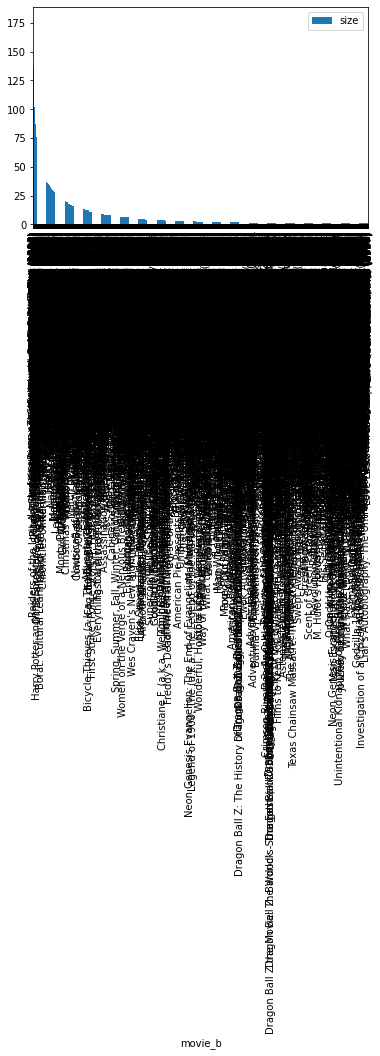

In [58]:
import matplotlib.pyplot as plt

# Plot the results== pick different movie next time, runs longtime
f.plot.bar(x='movie_b')
plt.show()

2.1.Content-Based Recommendation

In [72]:
m_df=pd.read_csv('movies.csv')
m_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
